In [3]:
import sys, os
from pathlib import Path
current_dir = os.path.join(Path().resolve())
sys.path.append(str(current_dir) + '/../')

from dezero.datasets import MNIST
from dezero import DataLoader
from dezero.models import MLP
from dezero.optimizers import SGD as opt
import dezero.functions as F
max_epoch = 5
batch_size = 100
hidden_size = 1000

train_set = MNIST(train=True)
test_set = MNIST(train=False)
train_loader = DataLoader(train_set, batch_size)
test_loader = DataLoader(test_set, batch_size, shuffle=False)

model = MLP((hidden_size, 10))
optimizer = opt().setup(model)

    

In [11]:
for epoch in range(max_epoch):
    sum_loss, sum_acc = 0, 0
    for x, t in train_loader:
        y = model(x)
        loss = F.softmax_cross_entropy(y, t)
        acc = F.accuracy(y.data, t)
        model.clear_grads()
        loss.backward()
        optimizer.update()

        sum_loss += float(loss.data) * len(t)
        sum_acc += acc * len(t)

    print(f'epoch {epoch+1}')
    print(f'train_loss: {sum_loss/len(train_set)}, accuracy: {sum_acc/len(train_set)}')

    sum_loss, sum_acc = 0, 0
    from dezero.config import no_grad
    with no_grad():
        for x, t in test_loader:
            y = model(x)
            loss =F.softmax_cross_entropy(y, t)
            acc = F.accuracy(y.data, t)
            sum_loss += float(loss.data) * len(t)
            sum_acc += acc * len(t)
        print(f'test_loss: {sum_loss/len(test_set)}, accuracy: {sum_acc/len(test_set)}')


epoch 1
train_loss: 0.4389342165629069, accuracy: 0.04905
test_loss: 2.14096736907959, accuracy: 0.4839
epoch 2
train_loss: 1.769216002146403, accuracy: 0.6504166666666666
test_loss: 1.414621199798584, accuracy: 0.7641
epoch 3
train_loss: 1.1898817850748697, accuracy: 0.78625
test_loss: 0.9783276401519775, accuracy: 0.8139
epoch 4
train_loss: 0.8754919581731161, accuracy: 0.826
test_loss: 0.7555869716644287, accuracy: 0.8511
epoch 5
train_loss: 0.7126159724553426, accuracy: 0.8455
test_loss: 0.6367608671188354, accuracy: 0.862


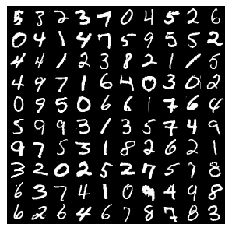

In [5]:
train_set.show()